In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [1]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [2]:
print(california)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [16]:
# Create a pandas DataFrame from the data
df = pd.DataFrame(california.data, columns=california.feature_names)
df['target'] = california.target

In [22]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
df.shape

(20640, 9)

In [24]:
# check for missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [25]:
correlation = df.corr()

<Axes: >

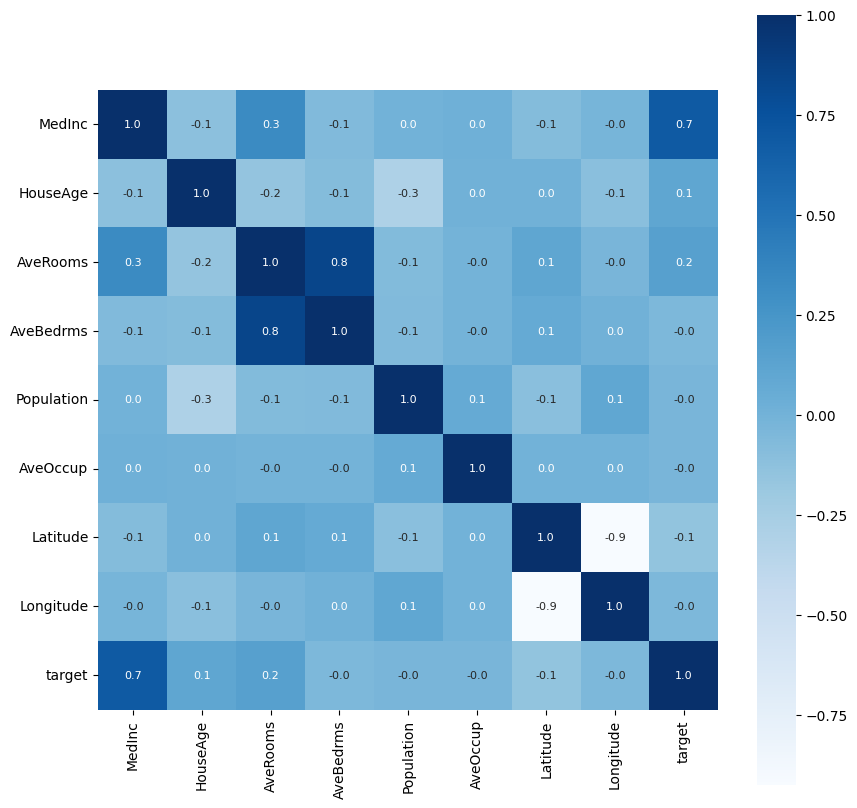

In [26]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [27]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [33]:
from sklearn.model_selection import train_test_split
# Split the DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2
)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15480, 8)
(5160, 8)
(15480,)
(5160,)


In [35]:
# loading the model
model = XGBRegressor()

In [39]:
# training the model with X_train
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [41]:
print(training_data_prediction)

[4.294801   2.7866     0.73280334 ... 1.4224068  2.3866665  2.6267428 ]


In [44]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9461553515845569
Mean Absolute Error :  0.18955464833165106


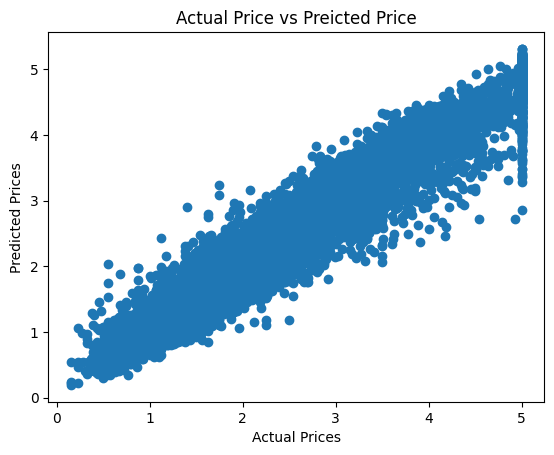

In [46]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [47]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [48]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8305575521013189
Mean Absolute Error :  0.3122401812604777


In [49]:
import pickle

In [50]:
# Save the trained model to a file
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [51]:
# Load the saved model from the file
with open('house_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [52]:
# Define new house data
new_house = pd.DataFrame({
    'MedInc': [6.0],       # Example: $60,000 median income
    'HouseAge': [30],      # Example: 30 years old
    'AveRooms': [5.5],     # Example: 5.5 rooms
    'AveBedrms': [1.1],    # Example: 1.1 bedrooms
    'Population': [1000],  # Example: 1000 people
    'AveOccup': [3.0],     # Example: 3 occupants per household
    'Latitude': [34.05],   # Example: Latitude for Los Angeles
    'Longitude': [-118.25] # Example: Longitude for Los Angeles
})

# Predict the house price
predicted_price = model.predict(new_house)

print(f"Predicted Median House Value: ${predicted_price[0] * 100000:.2f}")

Predicted Median House Value: $306806.00
